# Part 1 - Discrete Frourier Transform

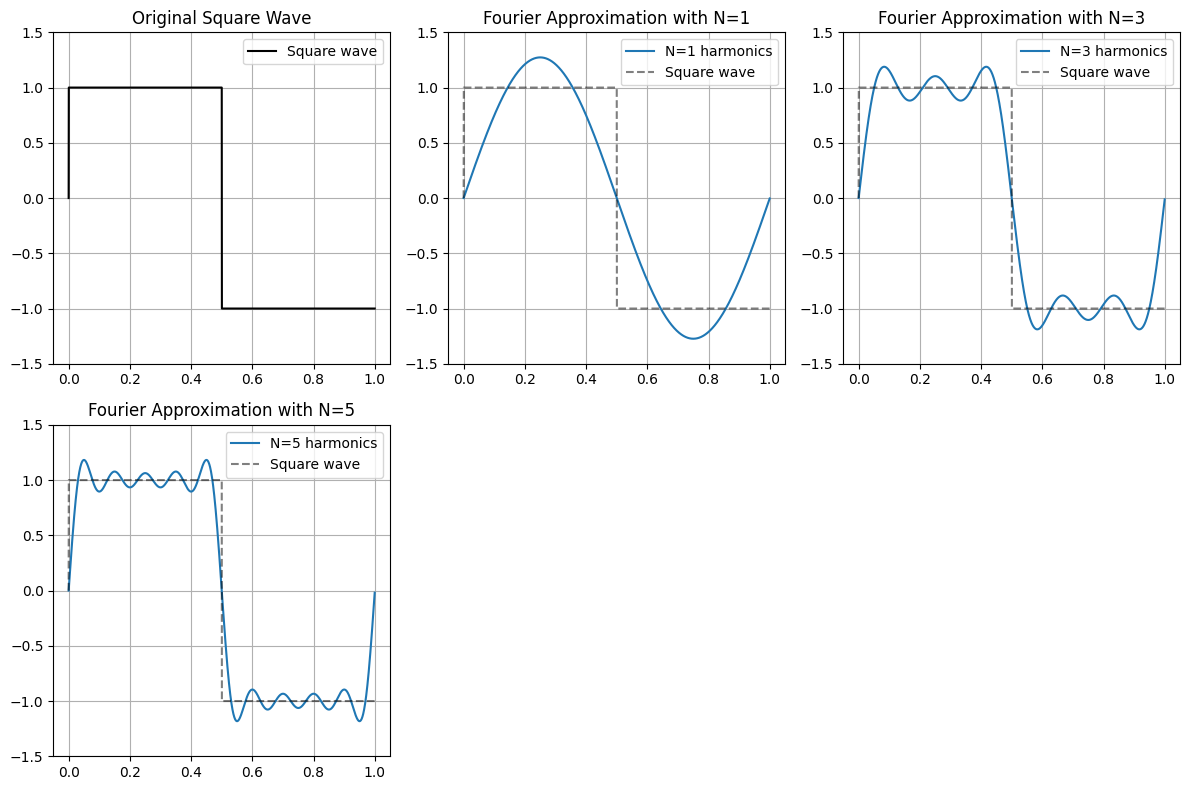

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Set parameters for the signal
N = 2048                # Number of sample points
T = 1.0                  # Duration of the signal in seconds
f0 = 1                   # fundamental frequency of the square wave in Hz

# list of harmonic numbers when constructing square wave
harmonics = [1, 3, 5]

# Reconstruct a square function (square wave) by summing sine waves of different frequencies using Fourier series.

# Define square wave function
def square_wave(t):
    return np.sign(np.sin(2.0 * np.pi * f0 * t))

# Fourier series approximation of square wave
def square_wave_fourier(t, f0, N):
    result = np.zeros_like(t)
    for k in range(N):
        n = 2 * k + 1  # Fourier series of a square wave only contains odd harmonics
        result += np.sin(2 * np.pi * n * f0 * t) / n # add harmonics to reconstruct square function
    return (4 / np.pi) * result

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, T, N, endpoint=False)

# generate original square wave
square = square_wave(t)

plt.figure(figsize=(12, 8))
# Plot original square wave
plt.subplot(2, 3, 1)
plt.plot(t, square, 'k', label="Square wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()
# Plot Fourier reconstructions
for i, Nh in enumerate(harmonics, start=2):
    plt.subplot(2, 3, i)
    y = square_wave_fourier(t, f0, Nh)
    plt.plot(t, y, label=f"N={Nh} harmonics")
    plt.plot(t, square, 'k--', alpha=0.5, label="Square wave")
    plt.title(f"Fourier Approximation with N={Nh}")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

 #### Try increasing the number of harmonics used in the reconstruction and consider the effect of adding higher-order harmonics, such as 20 or 50.

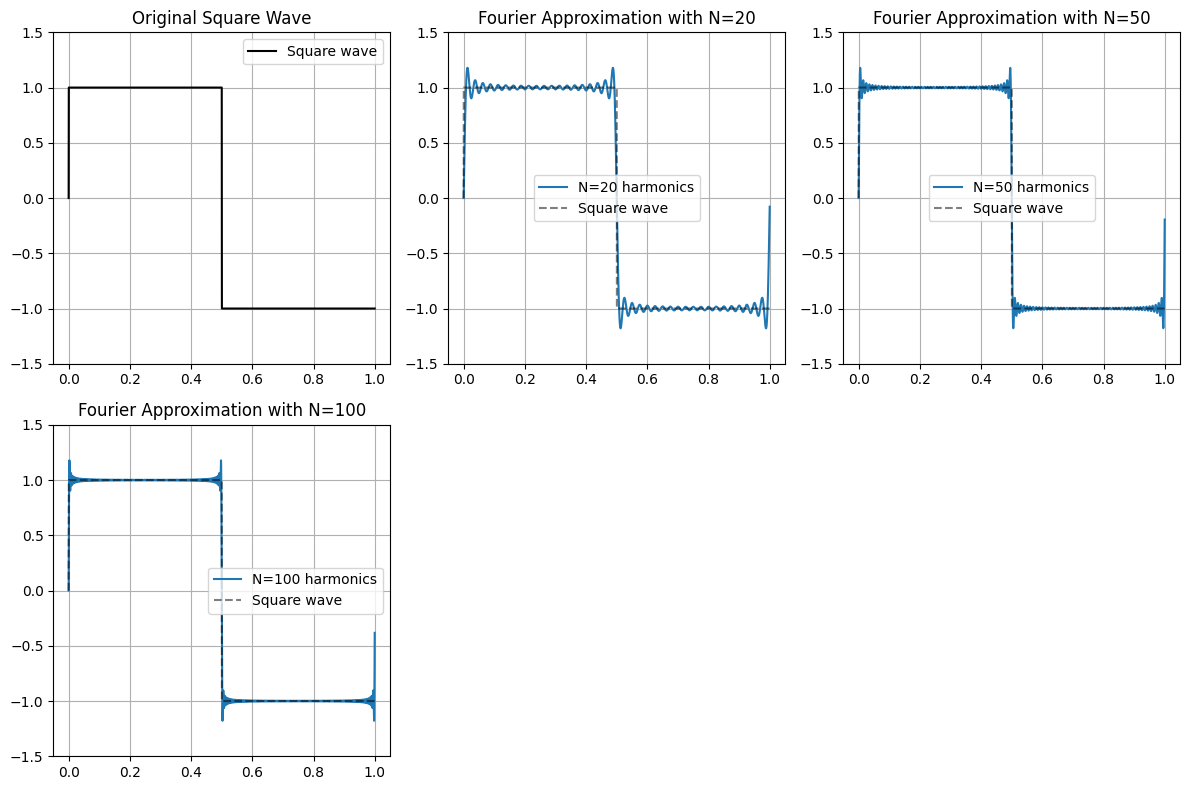

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time, math

# Set parameters for the signal
N = 2048 # Number of sample points
T = 1.0 # Duration of the signal in seconds
f0 = 1 # Fundamental frequency of the square wave in Hz

# List of harmonic numbers used to construct the square wave
harmonics = [20, 50, 100]

# Reconstruct a square function (square wave) by summing sine waves of different frequencies using Fourier series.

# Define square wave function
def square_wave(t):
    return np.sign(np.sin(2.0 * np.pi * f0 * t))

# Fourier series approximation of square wave
def square_wave_fourier(t, f0, N):
    result = np.zeros_like(t)
    for k in range(N):
        n = 2 * k + 1  # Fourier series of a square wave only contains odd harmonics
        result += np.sin(2 * np.pi * n * f0 * t) / n # add harmonics to reconstruct square function
    return (4 / np.pi) * result

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, T, N, endpoint=False)

# generate original square wave
square = square_wave(t)

plt.figure(figsize=(12, 8))

# Plot original square wave
plt.subplot(2, 3, 1)
plt.plot(t, square, 'k', label="Square wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()

# Plot Fourier reconstructions
for i, Nh in enumerate(harmonics, start=2):
    plt.subplot(2, 3, i)
    y = square_wave_fourier(t, f0, Nh)
    plt.plot(t, y, label=f"N={Nh} harmonics")
    plt.plot(t, square, 'k--', alpha=0.5, label="Square wave")
    plt.title(f"Fourier Approximation with N={Nh}")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

#### How do these additional components influence the accuracy and sharpness of the square wave

Adding higher order harmonics, adds high frequency content, so the sopes at the jumps get steeper and the peaks flatten. This makes the reconstruction more similar to the square wave overall as shown in the output where the transitions are closer together, shorter and narrower shape, and approaching closer to 1/-1.  

--- DFT/FFT Performance Comparison ---
Naïve DFT Execution Time: 17.551496 seconds
NumPy FFT Execution Time: 0.002178 seconds
FFT is approximately 8056.95 times faster.

Our DFT implementation is close to NumPy's FFT: True


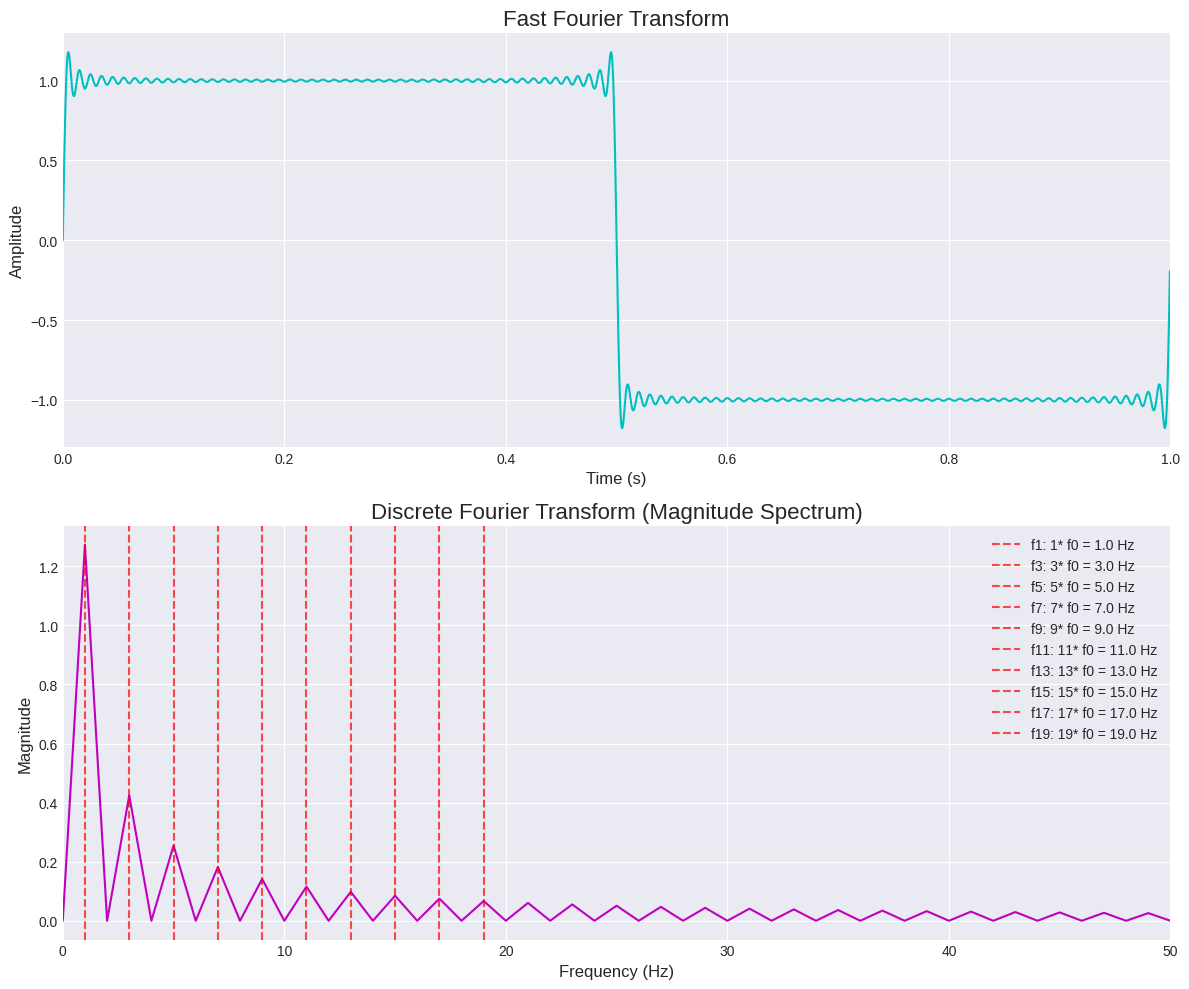

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

def naive_dft(x):
    """
    Computes the Discrete Fourier Transform (DFT) of a 1D signal.

    This is a "naïve" implementation that directly follows the DFT formula,
    which has a time complexity of O(N^2).

    Args:
        x (np.ndarray): The input signal, a 1D NumPy array.

    Returns:
        np.ndarray: The complex-valued DFT of the input signal.
    """
    N = len(x)
    # Create an empty array of complex numbers to store the DFT results
    X = np.zeros(N, dtype=np.complex128)

    # Iterate through each frequency bin (k)
    for k in range(N):
        # For each frequency bin, sum the contributions from all input samples (n)
        for n in range(N):
            # The core DFT formula: x[n] * e^(-2j * pi * k * n / N)
            angle = -2j * np.pi * k * n / N
            X[k] += x[n] * np.exp(angle)

    return X

# Construct a square wave using 50 harmonics
signal = square_wave_fourier(t, f0, 50)

# Time the naïve DFT implementation
start_time_naive = time.time()
dft_result = naive_dft(signal)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

# Time NumPy's FFT implementation
start_time_fft = time.time()
fft_result = np.fft.fft(signal)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft

# 3. Print Timings and Verification
print("--- DFT/FFT Performance Comparison ---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds")

# It's possible for the FFT to be so fast that the duration is 0.0, so we handle that case.
if fft_duration > 0:
  print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster.")
else:
  print("FFT was too fast to measure a significant duration difference.")

# Check if our implementation is close to NumPy's result
# np.allclose is used for comparing floating-point arrays.
print(f"\nOur DFT implementation is close to NumPy's FFT: {np.allclose(dft_result, fft_result)}")

# 4. Prepare for Plotting
# Generate the frequency axis for the plot.
# np.fft.fftfreq returns the DFT sample frequencies.
# We only need the first half of the frequencies (the positive ones) due to symmetry.
xf = np.fft.fftfreq(N, d=T/N)[:N//2]
# We normalize the magnitude by N and multiply by 2 to get the correct amplitude.
magnitude = 2.0/N * np.abs(dft_result[0:N//2])

# 5. Visualize the Results
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the Fast Fourier Transform
ax1.plot(t, signal, color='c')
ax1.set_title('Fast Fourier Transform', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_xlim(0, 1.0) # Show a few cycles of the sine wave
ax1.grid(True)

# Plot the frequency-domain signal (magnitude of the DFT)
# We normalize the magnitude by N and multiply by 2 to get the correct amplitude.
magnitude = 2.0/N * np.abs(dft_result[0:N//2])
ax2.plot(xf, magnitude, color='m')
ax2.set_title('Discrete Fourier Transform (Magnitude Spectrum)', fontsize=16)
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Magnitude', fontsize=12)
ax2.set_xlim(0, 50) # Focus on lower frequencies
ax2.grid(True)

# Add vertical lines for the first ten frequencies
for i in range(20):
    if i < len(xf) and i % 2 == 1: # Only plot odd harmonics
        ax2.axvline(
            xf[i], color='r', linestyle='--', alpha=0.7,
            label=f'f{i}: {i}* f0 = {xf[i]:.1f} Hz'
            )

# Only show labels for first 3 frequencies to avoid cluttering
ax2.legend()
plt.tight_layout()
plt.show()

#### Do you notice any differences, and if so, why might they occur?

* Performance: FFT was much faster than DFT because FFT uses O(NlongN) based on geeksforgeeks while DFT is O(N^2) based on the given code.

* Appearance: Based on the visualisation they appear to be different where FFT is similar shape as square wave fourier function (with same axis labels Amplitude and Time, and axis range) and DFT is a negative expotential shape and has different axis labels and axis range. However, the implementation is the closely similar despite the appearance based on all close numpy function.

#### With an AI of you choice or by hand using this code provided, you should be able to (re)use the code in a script or notebook locally or re-generate it using AI because you will need to modify the code in the next step. Now modify the ’square_wave’, ’square_wave_fourier’ and ’naive_dft’ functions so that they are implemented using TensorFlow (TF) or PyTorch operations. For ’naive_dft’ in particular, create a second version that explicitly runs on the GPU using TF/PyTorch tensor operations (rather than their built-in FFT functions, which behave similarly to NumPy’s implementation).

PROMPT:


Use the code provided, modify the ’square_wave’, ’square_wave_fourier’ and ’naive_dft’ functions so that they are implemented using PyTorch operations. For ’naive_dft’ in particular, create a second version that explicitly runs on the GPU using PyTorch tensor operations. Avoid using numpy forthis. Show the performance time only. No plots needed.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Set parameters for the signal
N = 2048                # Number of sample points
T = 1.0                  # Duration of the signal in seconds
f0 = 1                   # fundamental frequency of the square wave in Hz

# list of harmonic numbers when constructing square wave
harmonics = [1, 3, 5]

# Reconstruct a square function (square wave) by summing sine waves of different frequencies using Fourier series.

# Define square wave function
def square_wave(t):
    return np.sign(np.sin(2.0 * np.pi * f0 * t))

# Fourier series approximation of square wave
def square_wave_fourier(t, f0, N):
    result = np.zeros_like(t)
    for k in range(N):
        n = 2 * k + 1  # Fourier series of a square wave only contains odd harmonics
        result += np.sin(2 * np.pi * n * f0 * t) / n # add harmonics to reconstruct square function
    return (4 / np.pi) * result

def naive_dft(x):
    """
    Computes the Discrete Fourier Transform (DFT) of a 1D signal.

    This is a "naïve" implementation that directly follows the DFT formula,
    which has a time complexity of O(N^2).

    Args:
        x (np.ndarray): The input signal, a 1D NumPy array.

    Returns:
        np.ndarray: The complex-valued DFT of the input signal.
    """
    N = len(x)
    # Create an empty array of complex numbers to store the DFT results
    X = np.zeros(N, dtype=np.complex128)

    # Iterate through each frequency bin (k)
    for k in range(N):
        # For each frequency bin, sum the contributions from all input samples (n)
        for n in range(N):
            # The core DFT formula: x[n] * e^(-2j * pi * k * n / N)
            angle = -2j * np.pi * k * n / N
            X[k] += x[n] * np.exp(angle)

    return X

# Construct a square wave using 50 harmonics
signal = square_wave_fourier(t, f0, 50)

# Time the naïve DFT implementation
start_time_naive = time.time()
dft_result = naive_dft(signal)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

OUTPUT:

In [14]:
# ====== Benchmark: PyTorch square_wave, square_wave_fourier, and naïve DFT (CPU & GPU) ======
# Note: The naïve DFT is O(N^2) and intentionally slow; GPU helps but still scales quadratically.

import time
import torch

# -----------------------
# Config / params
# -----------------------
N = 2048                # number of sample points
T = 1.0                 # duration (s)
f0 = 1.0                # fundamental frequency (Hz)
HARMONICS = 50          # number of odd harmonics in the Fourier square wave used for DFT test
DTYPE = torch.float32
DEVICE_GPU = "cuda" if torch.cuda.is_available() else None

# -----------------------
# Torch signal helpers
# -----------------------
def square_wave_torch(t: torch.Tensor, f0: float) -> torch.Tensor:
    """Square wave via sign(sin(2π f0 t)) using Torch ops."""
    return torch.sign(torch.sin(2.0 * torch.pi * f0 * t))

def square_wave_fourier_torch(t: torch.Tensor, f0: float, num_harmonics: int) -> torch.Tensor:
    """Fourier series approximation of a square wave (odd harmonics only), all in Torch."""
    n = torch.arange(1, 2 * num_harmonics, 2, device=t.device, dtype=t.dtype)  # (H,)
    angles = 2.0 * torch.pi * f0 * torch.outer(t, n)                           # (N, H)
    s = torch.sin(angles) / n                                                  # (N, H)
    approx = (4.0 / torch.pi) * torch.sum(s, dim=1)                            # (N,)
    return approx

@torch.no_grad()
def naive_dft_torch(x: torch.Tensor) -> torch.Tensor:
    """
    Naïve O(N^2) DFT in Torch (no torch.fft).
    x: (N,) real/complex Torch tensor on its target device
    returns: (N,) complex Torch tensor on same device
    """
    N = x.shape[0]
    device = x.device
    k = torch.arange(N, device=device).reshape(N, 1)                   # (N,1)
    n = torch.arange(N, device=device).reshape(1, N)                   # (1,N)
    angle = (-2.0 * torch.pi * (k * n).to(x.dtype)) / N                # (N,N) float
    W = torch.complex(torch.cos(angle), -torch.sin(angle))             # (N,N) complex
    x_c = x if x.is_complex() else x.to(torch.complex64)
    return W @ x_c                                                     # (N,)

# -----------------------
# Simple benchmarking helper
# -----------------------
def benchmark(fn, *args, device: str = "cpu", repeats: int = 3, warmup: int = 1):
    """
    Benchmarks a callable. Assumes tensors are already on the correct device.
    Synchronizes for CUDA to get accurate wall times.
    Returns best (min) time over 'repeats'.
    """
    is_cuda = (device == "cuda")
    # warm-up
    for _ in range(warmup):
        out = fn(*args)
        if is_cuda: torch.cuda.synchronize()
    # timed runs
    best = float("inf")
    for _ in range(repeats):
        start = time.perf_counter()
        out = fn(*args)
        if is_cuda: torch.cuda.synchronize()
        elapsed = time.perf_counter() - start
        if elapsed < best:
            best = elapsed
    return best

# -----------------------
# Prepare inputs
# -----------------------
t_cpu = torch.linspace(0.0, T, steps=N, dtype=DTYPE, device="cpu")

t_gpu = None
if DEVICE_GPU:
    # Pre-create GPU tensors to avoid timing host<->device copies
    t_gpu = t_cpu.to(DEVICE_GPU, non_blocking=True)
    # small warmup to initialize CUDA context
    _ = (t_gpu + 1.0)
    torch.cuda.synchronize()

# -----------------------
# Benchmarks
# -----------------------
results = []

# square_wave
sq_cpu_time = benchmark(lambda tt: square_wave_torch(tt, f0), t_cpu, device="cpu")
results.append(("square_wave", "cpu", sq_cpu_time))

if t_gpu is not None:
    sq_gpu_time = benchmark(lambda tt: square_wave_torch(tt, f0), t_gpu, device="cuda")
    results.append(("square_wave", "gpu", sq_gpu_time))

# square_wave_fourier (HARMONICS terms)
swf_cpu_time = benchmark(lambda tt: square_wave_fourier_torch(tt, f0, HARMONICS), t_cpu, device="cpu")
results.append(("square_wave_fourier", "cpu", swf_cpu_time))

if t_gpu is not None:
    swf_gpu_time = benchmark(lambda tt: square_wave_fourier_torch(tt, f0, HARMONICS), t_gpu, device="cuda")
    results.append(("square_wave_fourier", "gpu", swf_gpu_time))

# Build signals for DFT test on each device (so timing excludes transfers)
sig_cpu = square_wave_fourier_torch(t_cpu, f0, HARMONICS)
dft_cpu_time = benchmark(naive_dft_torch, sig_cpu, device="cpu", repeats=2)  # O(N^2); keep repeats modest
results.append(("naive_dft", "cpu", dft_cpu_time))

if t_gpu is not None:
    sig_gpu = square_wave_fourier_torch(t_gpu, f0, HARMONICS)
    dft_gpu_time = benchmark(naive_dft_torch, sig_gpu, device="cuda", repeats=2)
    results.append(("naive_dft", "gpu", dft_gpu_time))

# -----------------------
# Report
# -----------------------
print(f"=== Benchmark (N={N}, harmonics={HARMONICS}, dtype={DTYPE}, GPU={'yes' if DEVICE_GPU else 'no'}) ===")
width_fn = max(len(r[0]) for r in results) + 2
width_dev = 6
print(f"{'Function'.ljust(width_fn)}{'Device'.ljust(width_dev)} Time (s)")
print("-" * (width_fn + width_dev + 10))
for fn_name, dev, secs in results:
    print(f"{fn_name.ljust(width_fn)}{dev.ljust(width_dev)}{secs:>8.6f}")

# Optional: speedup line for naïve DFT if both devices were tested
cpu_dft = next((s for f,d,s in results if f == "naive_dft" and d == "cpu"), None)
gpu_dft = next((s for f,d,s in results if f == "naive_dft" and d == "gpu"), None)
if cpu_dft is not None and gpu_dft is not None:
    print(f"\nGPU speedup for naïve DFT: {cpu_dft / gpu_dft:.2f}× (lower is faster)")
elif DEVICE_GPU is None:
    print("\nGPU not available — skipped GPU benchmarks.")


=== Benchmark (N=2048, harmonics=50, dtype=torch.float32, GPU=yes) ===
Function             Device Time (s)
-------------------------------------
square_wave          cpu   0.000022
square_wave          gpu   0.000065
square_wave_fourier  cpu   0.000342
square_wave_fourier  gpu   0.000134
naive_dft            cpu   0.075886
naive_dft            gpu   0.001607

GPU speedup for naïve DFT: 47.23× (lower is faster)


#### Compare its computation time with the other two methods, note the times in order of fastest to slowest.

1. Square Wave
2. Square Wave Fourier
3. Naive DFT (GPU)
4. Naive DFT (CPU)

#### Change the size of the data and note the change in timings of the three methods.

In [21]:
# Import Libraries
import time
import torch

# Configuration
DTYPE = torch.float32
F0 = 1.0
HARMONICS = 50
SIZES = [512, 1024, 2048]
HAS_GPU = torch.cuda.is_available()

def square_wave_torch(t: torch.Tensor, f0: float) -> torch.Tensor:
    """
    Square wave via sign(sin(2π f0 t)) using Torch ops.

    Args:
        t: (N,) real Torch tensor on its target device
        f0: Fundamental frequency

    Returns:
        (N,) real Torch tensor on same device
    """
    return torch.sign(torch.sin(2.0 * torch.pi * f0 * t))

def square_wave_fourier_torch(t: torch.Tensor, f0: float, num_harmonics: int) -> torch.Tensor:
    """
    Fourier series approximation of a square wave (odd harmonics only), all in Torch.

    Args:
        t: (N,) real Torch tensor on its target device
        f0: Fundamental frequency
        num_harmonics: Number of odd harmonics to include (1, 3, 5, ..., up to this count)

    Returns:
        (N,) real Torch tensor on same device
    """
    n = torch.arange(1, 2 * num_harmonics, 2, device=t.device, dtype=t.dtype)
    angles = 2.0 * torch.pi * f0 * torch.outer(t, n)
    s = torch.sin(angles) / n
    approx = (4.0 / torch.pi) * torch.sum(s, dim=1)
    return approx

@torch.no_grad()
def naive_dft_torch(x: torch.Tensor) -> torch.Tensor:
    """
    Naïve O(N^2) DFT in Torch (no torch.fft).
    x: (N,) real/complex Torch tensor on its target device
    returns: (N,) complex Torch tensor on same device

    Args:
        x: Input tensor of shape (N,).

    Returns:
        DFT of the input tensor of shape (N,).
    """
    N = x.shape[0]
    device = x.device
    k = torch.arange(N, device=device).reshape(N, 1)
    n = torch.arange(N, device=device).reshape(1, N)
    angle = (-2.0 * torch.pi * (k * n).to(x.dtype)) / N
    W = torch.complex(torch.cos(angle), -torch.sin(angle))
    x_c = x if x.is_complex() else x.to(torch.complex64)
    return W @ x_c

def benchmark(fn, *args, device: str, warmup=1, repeats=3):
    """
    Benchmarks a callable. Assumes tensors are already on the correct device.
    Synchronizes for CUDA to get accurate wall times.
    Returns best (min) time over 'repeats'.

    Args:
        fn: Callable to benchmark.
        *args: Arguments to pass to the callable.
        device: Device type ("cpu" or "cuda").
        warmup: Number of warm-up runs.
        repeats: Number of timed runs.

    Returns:
        Best time in seconds.
    """
    is_cuda = (device == "cuda")

    # Warm-up runs
    for _ in range(warmup):
        out = fn(*args)
        if is_cuda: torch.cuda.synchronize()

    # Set best time to infinity
    best = float("inf")

    # Find best time over several runs
    for _ in range(repeats):
        start = time.perf_counter()
        out = fn(*args)
        if is_cuda: torch.cuda.synchronize()
        elapsed = time.perf_counter() - start
        if elapsed < best:
            best = elapsed
    return best


def run_suite(N, device):
    """
    Runs all benchmarks for a given size N and device.

    Args:
        N: Size of the input tensor.
        device: Device type ("cpu" or "cuda").

    Returns:
        Dictionary of benchmark results.
    """
    # Prepare input signal
    t = torch.linspace(0.0, 1.0, steps=N, dtype=DTYPE, device=device)
    sig = square_wave_fourier_torch(t, F0, HARMONICS)

    # Run benchmarks
    res = {}
    res["square_wave"] = benchmark(lambda tt: square_wave_torch(tt, F0), t, device=device)
    res["square_wave_fourier"] = benchmark(lambda tt: square_wave_fourier_torch(tt, F0, HARMONICS), t, device=device)
    res["naive_dft"] = benchmark(naive_dft_torch, sig, device=device, repeats=2)

    return res

for N in SIZES:
    # Run benchmarks and collect rows: (function, device, seconds)
    results = []

    # CPU runs
    cpu = run_suite(N, "cpu")
    for fn, secs in cpu.items():
        results.append((fn, "cpu", secs))

    # GPU runs
    DEVICE_GPU = HAS_GPU
    if DEVICE_GPU:
        _ = torch.tensor([0.0], device="cuda")
        gpu = run_suite(N, "cuda")
        for fn, secs in gpu.items():
            results.append((fn, "gpu", secs))

    print(f"Size (N) = {N})")

    # Print results in aligned columns
    width_fn = max(len(r[0]) for r in results) + 2
    width_dev = 6

    print(f"{'Function'.ljust(width_fn)}{'Device'.ljust(width_dev)} Time (s)")
    print("-" * (width_fn + width_dev + 10))

    # Print each result row
    for fn_name, dev, secs in sorted(results, key=lambda r: (r[0], r[1])):
        print(f"{fn_name.ljust(width_fn)}{dev.ljust(width_dev)}{secs:>8.6f}")

    # Print speedup line for naïve DFT if both devices were tested
    cpu_dft = next((s for f, d, s in results if f == "naive_dft" and d == "cpu"), None)
    gpu_dft = next((s for f, d, s in results if f == "naive_dft" and d == "gpu"), None)
    if cpu_dft is not None and gpu_dft is not None:
        print(f"\nGPU speedup for naïve DFT: {cpu_dft / gpu_dft:.2f}x")
    elif not DEVICE_GPU:
        print("\nGPU not available — skipped GPU benchmarks.")



Size (N) = 512)
Function             Device Time (s)
-------------------------------------
naive_dft            cpu   0.002287
naive_dft            gpu   0.000224
square_wave          cpu   0.000017
square_wave          gpu   0.000042
square_wave_fourier  cpu   0.000165
square_wave_fourier  gpu   0.000104

GPU speedup for naïve DFT: 10.21x
Size (N) = 1024)
Function             Device Time (s)
-------------------------------------
naive_dft            cpu   0.008222
naive_dft            gpu   0.000486
square_wave          cpu   0.000018
square_wave          gpu   0.000096
square_wave_fourier  cpu   0.000196
square_wave_fourier  gpu   0.000121

GPU speedup for naïve DFT: 16.93x
Size (N) = 2048)
Function             Device Time (s)
-------------------------------------
naive_dft            cpu   0.056623
naive_dft            gpu   0.001612
square_wave          cpu   0.000015
square_wave          gpu   0.000042
square_wave_fourier  cpu   0.000270
square_wave_fourier  gpu   0.000102

GPU sp

The order of fastest performance is the same, no matter the change of size in the data.

The performance gap between cpu and gpu gets wider the higher the size of data used, especially in more complex functions.

#### Can you explain the order of the methods in terms of time, i.e., why is the fastest method the fastest you have observed?

Due to time complexity, the fastest time complexity is square wave with O(N), second is square wave fourier of O(N\*H) then Naive DFT is O(N^2).
Also memory plays a role in the order of the performance time where square wave uses a single simple kernel to execute so it is fast, while Naive DFT uses N\*N complex kernal so it would take longer to process.

# Part 2 - Eigenfaces


#### Show you the performance of the RF/PCA based face recognition. (1 Mark)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
(966, 150)
(322, 150)


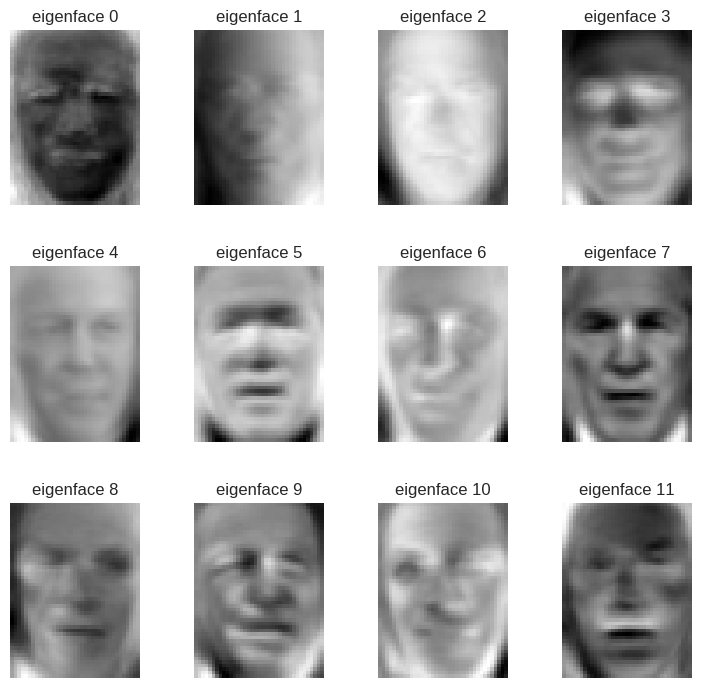

(966,)


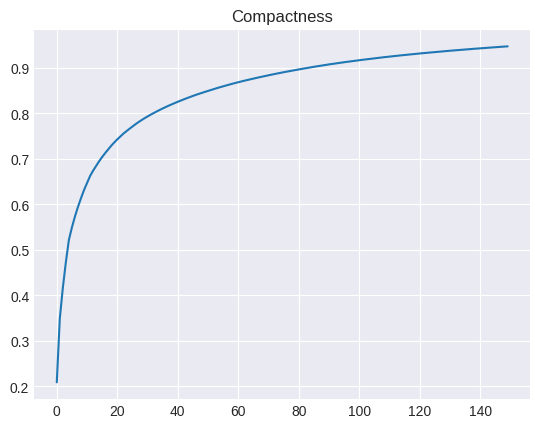

Accuracy: 0.6024844720496895
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        13
     Colin Powell       0.63      0.53      0.58        60
  Donald Rumsfeld       0.40      0.15      0.22        27
    George W Bush       0.63      0.90      0.74       146
Gerhard Schroeder       0.53      0.40      0.45        25
      Hugo Chavez       0.70      0.47      0.56        15
       Tony Blair       0.43      0.28      0.34        36

         accuracy                           0.60       322
        macro avg       0.47      0.39      0.41       322
     weighted avg       0.56      0.60      0.56       322



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# For machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# The label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# Split into a training set and a test set using a stratified k fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

# Center data
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean

#Eigen-decomposition
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))

#project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)

# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  """Helper function to plot a gallery of portraits"""
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)

plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# Build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) # Expects X as [n_samples, n_features]
predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)

# print("Gnd Truth:", y_test)
# print("Total Testing", total_test)
# print("Predictions", predictions)
# print("Which Correct:",correct)
# print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)
print(classification_report(y_test, predictions, target_names=target_names))

#### Re-implement the above PCA algorithm of the Eigenfaces problem using TF or PyTorch functions. (2 Marks)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Using device: cuda
torch.Size([966, 150])
torch.Size([322, 150])


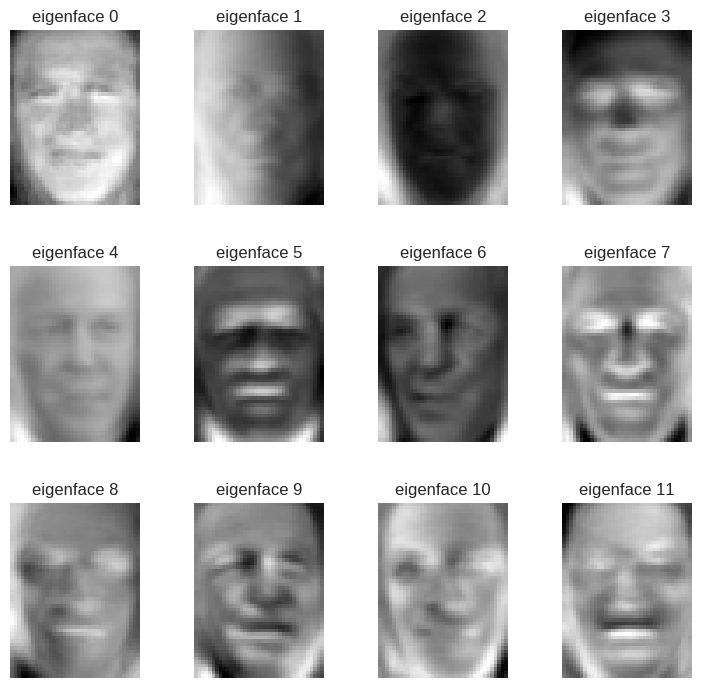

torch.Size([966])


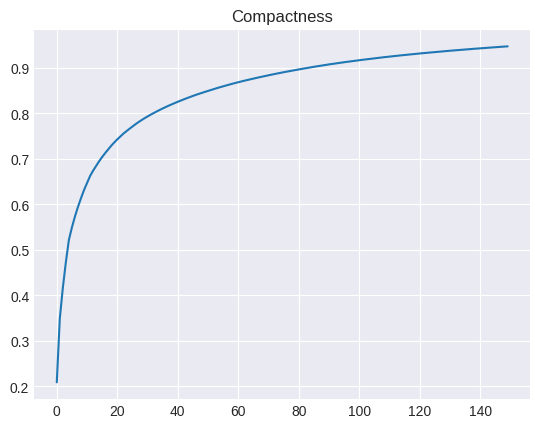

Accuracy: tensor(0.6335)
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.08      0.14        13
     Colin Powell       0.69      0.62      0.65        60
  Donald Rumsfeld       0.80      0.15      0.25        27
    George W Bush       0.64      0.91      0.75       146
Gerhard Schroeder       0.48      0.40      0.43        25
      Hugo Chavez       0.60      0.60      0.60        15
       Tony Blair       0.53      0.28      0.36        36

         accuracy                           0.63       322
        macro avg       0.68      0.43      0.46       322
     weighted avg       0.65      0.63      0.59       322



In [8]:
# Import Libraries
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import torch

# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# Split into a training set and a test set using a stratified k fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

# Set Device (CHANGED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Convert to torch tensors (CHANGED)
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

# Center data (CHANGED)
mean = torch.mean(X_train, axis=0)
X_train -= mean
X_test -= mean

# Eigen-decomposition (CHANGED)
U, S, V = torch.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))

# Project into PCA subspace (CHANGED)
X_transformed = torch.matmul(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = torch.matmul(X_test, components.T)
print(X_test_transformed.shape)

# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  """Helper function to plot a gallery of portraits"""
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

# Plot eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

# Explained variance
explained_variance = (S**2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = torch.cumsum(explained_variance_ratio, dim=0) # (CHANGED)
print(ratio_cumsum.shape)

# Plot compactness
eigenvalueCount = torch.arange(n_components) # (CHANGED)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title("Compactness")
plt.show()

# Build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]
predictions = estimator.predict(X_test_transformed)
correct = predictions == y_test
total_test = len(X_test_transformed)

# print("Gnd Truth:", y_test)
# print("Total Testing", total_test)
# print("Predictions", predictions)
# print("Which Correct:",correct)
# print("Total Correct:", torch.sum(correct)) # (CHANGED)

print("Accuracy:", torch.sum(correct) / total_test) # (CHANGED)
print(classification_report(y_test, predictions, target_names=target_names))

# Part 3 - CNN

## 3.1 CNN CLassifier

In [9]:
# Import Libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import time

# Load Data
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4, color=False)
X = lfw_people.images
y = lfw_people.target
n_classes = len(lfw_people.target_names)

# Normalize to [0, 1]
X = X.astype(np.float32)
x_max = X.max()
if x_max > 1.0:
    X = X / 255.0

# Add channel dimension
X = X[:, np.newaxis, :, :]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Torch tensors
X_train_t = torch.from_numpy(X_train)
y_train_t = torch.from_numpy(y_train).long()
X_test_t  = torch.from_numpy(X_test)
y_test_t  = torch.from_numpy(y_test).long()

# Dataloaders
batch_size = 128
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test_t,  y_test_t),  batch_size=batch_size, shuffle=False)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the CNN model
class CNN(nn.Module):
    def __init__(self, num_classes):
        """
        Initialize the CNN model.

        Args:
            num_classes: Number of output classes.
        """
        super().__init__()

        # Convolutional layers
        self.features = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size = 2),

            nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size = 2)
        )

        # Flatten layer
        self.flatten = nn.Flatten()

        # Fully connected layers
        self.classifier = nn.Sequential(
            nn.LazyLinear(out_features = 128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(in_features = 128, out_features = num_classes)
        )

    def forward(self, x):
        """
        Forward pass of the model.

        Args:
            z: Input tensor of shape (batch_size, 1, height, width).

        Returns:
            Output tensor of shape (batch_size, num_classes).
        """
        out = self.features(x)
        out = self.flatten(out)
        out = self.classifier(out)
        return out

# Model, loss function, optimizer
model = CNN(n_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss() # Same as tensorflow sparse categorical cros entropy loss
num_epochs = 15 # Number of epochs

# Evaluate Accuracy
def evaluate(loader):
    """
    Evaluate the model on a given data loader.

    Args:
        loader: DataLoader for evaluation data.

    Returns:
        Tuple of (loss, accuracy).
    """
    model.eval()
    correct, total, loss_sum = 0, 0, 0.0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            logits = model(images)
            loss = criterion(logits, labels)
            preds = logits.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total   += labels.size(0)
            loss_sum += loss.item() * labels.size(0)
    return loss_sum / total, correct / total


# Start time
start_time = time.time()

# Training the model
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Training loop
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * yb.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    test_loss, test_acc = evaluate(test_loader)

    print(f"Epoch {epoch:02d}/{num_epochs} | train_loss={train_loss:.4f} | "
          f"val_loss={test_loss:.4f} | val_acc={test_acc:.3f}")

# Total training time
end_time = time.time()
print(f"\nTraining complete in {end_time - start_time:.2f} seconds.")

# Final test accuracy
test_loss, test_acc = evaluate(test_loader)
print(f"\nFinal Test - loss: {test_loss:.4f}, accuracy: {test_acc:.3f}")

Epoch 00/15 | train_loss=1.7560 | val_loss=1.6800 | val_acc=0.413
Epoch 01/15 | train_loss=1.7038 | val_loss=1.6693 | val_acc=0.413
Epoch 02/15 | train_loss=1.6854 | val_loss=1.6575 | val_acc=0.413
Epoch 03/15 | train_loss=1.6551 | val_loss=1.6306 | val_acc=0.413
Epoch 04/15 | train_loss=1.6202 | val_loss=1.6033 | val_acc=0.419
Epoch 05/15 | train_loss=1.5813 | val_loss=1.5304 | val_acc=0.484
Epoch 06/15 | train_loss=1.4989 | val_loss=1.4146 | val_acc=0.494
Epoch 07/15 | train_loss=1.3970 | val_loss=1.3473 | val_acc=0.516
Epoch 08/15 | train_loss=1.3086 | val_loss=1.2218 | val_acc=0.565
Epoch 09/15 | train_loss=1.1898 | val_loss=1.1725 | val_acc=0.568
Epoch 10/15 | train_loss=1.1060 | val_loss=1.0283 | val_acc=0.652
Epoch 11/15 | train_loss=0.9908 | val_loss=0.9592 | val_acc=0.711
Epoch 12/15 | train_loss=0.9386 | val_loss=0.8507 | val_acc=0.739
Epoch 13/15 | train_loss=0.8443 | val_loss=0.8386 | val_acc=0.739
Epoch 14/15 | train_loss=0.7513 | val_loss=0.7483 | val_acc=0.752

Training 

## 3.2 Advanced Git Course (2 Marks)


DONE

## 3.3  DAWNBench Challenge (4 Marks)

In [10]:
# Import Libraries
import torch
import torch.nn  as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import time

# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 35
learning_rate = 0.1

# Data augmentation and normalization for training
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4, padding_mode='reflect'),

])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load the standard dataset using PyTorch data pipelines
trainset = torchvision.datasets.CIFAR10(
    root='cifar10', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR10(
    root='cifar10', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Define the ResNet model
class BasicBlock(nn.Module):
  """
  Basic Block for ResNet18 and ResNet34
  """
  expansion = 1 # No expansion in Basic Block

  def __init__(self, in_planes, planes, stride=1):
    """
    Initialize the BasicBlock.

    Args:
        in_planes: Number of input channels.
        planes: Number of output channels.
        stride: Stride for the convolutional layer.
    """
    super(BasicBlock, self).__init__()

    # First convolutional layer
    self.conv1 = nn.Conv2d(
        in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)

    # Batch normalization layer
    self.bn1 = nn.BatchNorm2d(planes)

    # Second convolutional layer
    self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                           stride=1, padding=1, bias=False)

    # Second batch normalization layer
    self.bn2 = nn.BatchNorm2d(planes)

    # Shortcut connection
    self.shortcut = nn.Sequential()

    # The shortcut needs to match the dimensions
    if stride != 1 or in_planes != self.expansion*planes:
      self.shortcut = nn.Sequential(
          nn.Conv2d(in_planes, self.expansion*planes,
                    kernel_size=1, stride=stride, bias=False),
          nn.BatchNorm2d(self.expansion*planes)
      )

  def forward(self, x):
    """
    Forward pass of the BasicBlock.

    Args:
        out: Input tensor of shape (batch_size, in_planes, height, width).

    Returns:
        out: Output tensor of shape (batch_size, expansion*planes, height/stride, width/stride).
    """
    out = F.relu(self.bn1(self.conv1(x)))
    out = self.bn2(self.conv2(out))
    out += self.shortcut(x)
    out = F.relu(out)
    return out

class ResNet(nn.Module):
    """
    ResNet Model
    """

    def __init__(self, block, num_blocks, num_classes = 10):
        """
        Initialize the ResNet model.

        Args:
            block: Block type to be used (BasicBlock or Bottleneck).
            num_blocks: List containing the number of blocks in each layer.
            num_classes: Number of output classes.
        """
        super(ResNet, self).__init__()
        self.in_planes = 64

        # Initial convolutional layer
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                            stride=1, padding=1, bias=False)

        # Batch normalization layer
        self.bn1 = nn.BatchNorm2d(64)

        # Residual layers
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)

        # Fully connected layer
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        """
        Create a layer consisting of multiple blocks.

        Args:
            block: Block type to be used (BasicBlock or Bottleneck).
            planes: Number of output channels for the blocks in this layer.
            num_blocks: Number of blocks to be stacked in this layer.
            stride: Stride for the first block in this layer.

        Returns:
            nn.Sequential containing the stacked blocks.
        """
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        """
        Forward pass of the ResNet model.

        Args:
            x: Input tensor of shape (batch_size, 3, height, width).

        Returns:
            out: Output tensor of shape (batch_size, num_classes).
        """
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

def ResNet18():
  """
  Construct a ResNet-18 model.
  """
  return ResNet(BasicBlock, [2,2,2,2])

# Create the ResNet-18 model
model = ResNet18()
model = model.to(device)
# Define the optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-4)


total_step = len(trainloader)
sched_linear_1 = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.005, max_lr=learning_rate, step_size_up=15, step_size_down=15, mode="triangular")
sched_linear_3 = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=0.005/learning_rate, end_factor=0.005/5)
scheduler = torch.optim.lr_scheduler.SequentialLR(optimizer, schedulers=[sched_linear_1, sched_linear_3], milestones=[30])

# Start training and report the time taken.
model.train()
start = time.time()

# Train the model with a simple training loop
for epoch in range(num_epochs):

    # Training loop
    for i, (images, labels) in enumerate(trainloader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimise
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print loss every 100 steps
        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.5f}"
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Update the learning rate
    scheduler.step()

# Print total training time
end = time.time()
elasped = end - start
print("Training took " + str(elasped) + " seconds or "+ str(elasped/60) + " minutes")

# Test the model
start = time.time()

with torch.no_grad():
  correct = 0
  total = 0

  # Iterate through the test dataset and compute accuracy
  for images, labels in testloader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print('Test Accuracy: {} %'.format(100 * correct / total))

# Print total testing time
end = time.time()
elasped = end - start
print("Training took " + str(elasped) + " seconds or "+ str(elasped/60) + " minutes")

100%|██████████| 170M/170M [00:09<00:00, 18.0MB/s]


Epoch [1/35], Step [100/391] Loss: 1.43903
Epoch [1/35], Step [200/391] Loss: 1.34820
Epoch [1/35], Step [300/391] Loss: 1.15277
Epoch [2/35], Step [100/391] Loss: 0.94031
Epoch [2/35], Step [200/391] Loss: 0.84468
Epoch [2/35], Step [300/391] Loss: 0.80793
Epoch [3/35], Step [100/391] Loss: 0.73078
Epoch [3/35], Step [200/391] Loss: 0.61608
Epoch [3/35], Step [300/391] Loss: 0.70115
Epoch [4/35], Step [100/391] Loss: 0.81782
Epoch [4/35], Step [200/391] Loss: 0.64966
Epoch [4/35], Step [300/391] Loss: 0.47511
Epoch [5/35], Step [100/391] Loss: 0.46994
Epoch [5/35], Step [200/391] Loss: 0.52906
Epoch [5/35], Step [300/391] Loss: 0.74590
Epoch [6/35], Step [100/391] Loss: 0.48999
Epoch [6/35], Step [200/391] Loss: 0.49985
Epoch [6/35], Step [300/391] Loss: 0.53100
Epoch [7/35], Step [100/391] Loss: 0.54822
Epoch [7/35], Step [200/391] Loss: 0.46730
Epoch [7/35], Step [300/391] Loss: 0.35111
Epoch [8/35], Step [100/391] Loss: 0.39784
Epoch [8/35], Step [200/391] Loss: 0.46478
Epoch [8/35

/usr/local/lib/python3.12/dist-packages/torch/optim/lr_scheduler.py:209: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch [31/35], Step [100/391] Loss: 0.08809
Epoch [31/35], Step [200/391] Loss: 0.01706
Epoch [31/35], Step [300/391] Loss: 0.01885
Epoch [32/35], Step [100/391] Loss: 0.06717
Epoch [32/35], Step [200/391] Loss: 0.03579
Epoch [32/35], Step [300/391] Loss: 0.02094
Epoch [33/35], Step [100/391] Loss: 0.06419
Epoch [33/35], Step [200/391] Loss: 0.06599
Epoch [33/35], Step [300/391] Loss: 0.02983
Epoch [34/35], Step [100/391] Loss: 0.03334
Epoch [34/35], Step [200/391] Loss: 0.07865
Epoch [34/35], Step [300/391] Loss: 0.02855
Epoch [35/35], Step [100/391] Loss: 0.04064
Epoch [35/35], Step [200/391] Loss: 0.03504
Epoch [35/35], Step [300/391] Loss: 0.01803
Training took 1414.7882452011108 seconds or 23.57980408668518 minutes
Test Accuracy: 93.26 %
Training took 4.308962821960449 seconds or 0.07181604703267415 minutes


# Part 4 - Recognition

## 4.3 Tasks

### 4.3.1 Variational Autocoder

Mounted at /content/drive
Epoch 01 | Loss: 4610.1936
Epoch 02 | Loss: 4221.2985
Epoch 03 | Loss: 4176.8773
Epoch 04 | Loss: 4154.9622
Epoch 05 | Loss: 4142.0317
Epoch 06 | Loss: 4133.1901
Epoch 07 | Loss: 4127.6294
Epoch 08 | Loss: 4120.2542
Epoch 09 | Loss: 4115.9242
Epoch 10 | Loss: 4113.3283


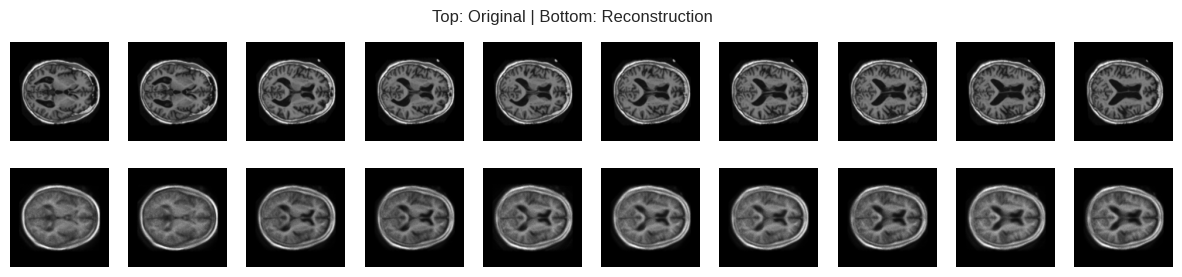

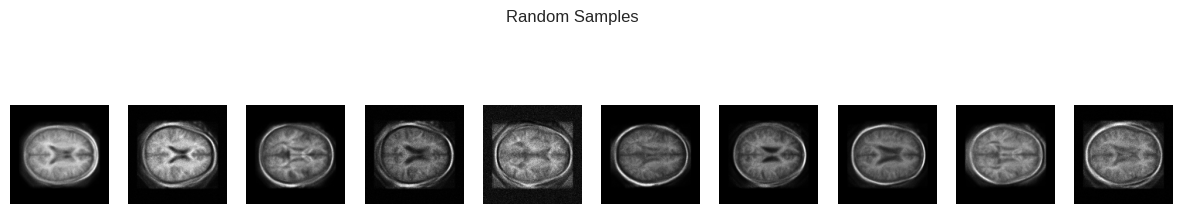

In [11]:
# Import Libraries
import os, glob, random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

# Configure device and seeds
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)
np.random.seed(42)

# Setup paths
USE_GOOGLE_DRIVE = True
DATA_ROOT = "/content/drive/MyDrive/keras_png_slices_data"
TRAIN_DIR = f"{DATA_ROOT}/keras_png_slices_train"
VAL_DIR   = f"{DATA_ROOT}/keras_png_slices_validate"
TEST_DIR  = f"{DATA_ROOT}/keras_png_slices_test"

if USE_GOOGLE_DRIVE:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

def list_pngs(folder):
    return sorted(glob.glob(os.path.join(folder, "*.png")))

# Get list of PNG files
train_files = list_pngs(TRAIN_DIR)
val_files   = list_pngs(VAL_DIR)
test_files  = list_pngs(TEST_DIR)

#
assert len(train_files) > 0 and len(val_files) > 0, "No PNGs found. Check DATA_ROOT & subfolders."

IMG_SIZE = 128  # OASIS slices will be resized to 128x128

# Dataset class
to_tensor = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

class OasisPNGSlices(Dataset):
    """
    Creates dataset for OASIS PNG slices.
    """

    def __init__(self, files, transform=None, flatten=True):
        """
        Initialize the dataset.

        Args:
            files: List of file paths to PNG images.
            transform: Transformations to apply to the images.
            flatten: Whether to flatten the images into 1D tensors.
        """
        self.files = files
        self.transform = transform
        self.flatten = flatten

    def __len__(self):
        """ Return the total number of samples. """
        return len(self.files)

    def __getitem__(self, idx):
        """
        Retrieve the image at the specified index.

        Args:
            idx: Index of the image to retrieve.

        Returns:
            img: Transformed image tensor.
        """
        path = self.files[idx]
        img = Image.open(path).convert("L")
        if self.transform:
            img = self.transform(img)
        if self.flatten:
            img = img.view(-1)
        return img


# Hyperparameters
input_dim  = IMG_SIZE * IMG_SIZE
hidden_dim = 1024
latent_dim = 20
lr         = 1e-3
epochs     = 10
batch_size = 128

# Setup Datasets
train_dataset = OasisPNGSlices(train_files, transform=to_tensor, flatten=True)
val_dataset   = OasisPNGSlices(val_files,   transform=to_tensor, flatten=True)
test_dataset  = OasisPNGSlices(test_files,  transform=to_tensor, flatten=True)

pin = True if device.type == "cuda" else False

# Set Data Loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  num_workers=2, pin_memory=pin)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=pin)

# Encoder, Decoder, VAE, Loss Function
class Encoder(nn.Module):
    """
    Encoder network for VAE.
    """
    def __init__(self, input_dim, hidden_dim, latent_dim):
        """
        Initialize the Encoder.

        Args:
            input_dim: Dimensionality of the input data.
            hidden_dim: Number of hidden units.
            latent_dim: Dimensionality of the latent space.
        """
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)

    def forward(self, x):
        """
        Forward pass of the Encoder.

        Args:
            x: Input tensor of shape (batch_size, input_dim).

        Returns:
            mu: Mean of the latent distribution.
            logvar: Log-variance of the latent distribution.
        """
        h = torch.relu(self.fc1(x))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

class Decoder(nn.Module):
    """
    Decoder network for VAE.
    """
    def __init__(self, latent_dim, hidden_dim, output_dim):
        """
        Initialize the Decoder.

        Args:
            latent_dim: Dimensionality of the latent space.
            hidden_dim: Number of hidden units.
            output_dim: Dimensionality of the output data.
        """
        super().__init__()
        self.fc1 = nn.Linear(latent_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, z):
        """
        Forward pass of the Decoder.

        Args:
            z: Latent tensor of shape (batch_size, latent_dim).

        Returns:
            x_hat: Reconstructed tensor of shape (batch_size, output_dim).
        """
        h = torch.relu(self.fc1(z))
        x_hat = torch.sigmoid(self.fc2(h))
        return x_hat

class VAE(nn.Module):
    """
    Variational Autoencoder (VAE) model.
    """
    def __init__(self, input_dim, hidden_dim, latent_dim):
        """
        Initialize the VAE.

        Args:
            input_dim: Dimensionality of the input data.
            hidden_dim: Number of hidden units.
            latent_dim: Dimensionality of the latent space.
        """
        super().__init__()
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)

    def forward(self, x):
        """
        Forward pass of the VAE.

        Args:
            x: Input tensor of shape (batch_size, input_dim).

        Returns:
            x_hat: Reconstructed tensor of shape (batch_size, input_dim).
            mu: Mean of the latent distribution.
            logvar: Log-variance of the latent distribution.
        """
        mu, logvar = self.encoder(x)
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        x_hat = self.decoder(z)
        return x_hat, mu, logvar

def loss_function(x, x_hat, mu, logvar):
    """
    Compute the VAE loss function.

    Args:
        x: Original input tensor of shape (batch_size, input_dim).
        x_hat: Reconstructed tensor of shape (batch_size, input_dim).
        mu: Mean of the latent distribution.
        logvar: Log-variance of the latent distribution.

    Returns:
        loss: Total loss (reconstruction + KL divergence).
    """
    BCE = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Initialise model and optimizer
vae = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(vae.parameters(), lr=lr)

# Training loop
vae.train()
for epoch in range(1, epochs + 1):
    train_loss = 0.0
    for x in train_loader:
        x = x.to(device, non_blocking=True)
        optimizer.zero_grad()
        x_hat, mu, logvar = vae(x)
        loss = loss_function(x, x_hat, mu, logvar)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    avg = train_loss / len(train_dataset)
    print(f"Epoch {epoch:02d} | Loss: {avg:.4f}")

# Visualising reconstructed outputs
vae.eval()
with torch.no_grad():
    x = next(iter(val_loader))[:10].to(device)
    x_hat, _, _ = vae(x)
    x_img     = x.view(-1, 1, IMG_SIZE, IMG_SIZE).cpu()
    xhat_img  = x_hat.view(-1, 1, IMG_SIZE, IMG_SIZE).cpu()

    fig, axs = plt.subplots(2, 10, figsize=(15, 3))

    # Plot original and reconstructed images
    for i in range(10):
        axs[0, i].imshow(x_img[i, 0].numpy(), cmap='gray')
        axs[1, i].imshow(xhat_img[i, 0].numpy(), cmap='gray')
        axs[0, i].axis('off'); axs[1, i].axis('off')
    plt.suptitle("Top: Original | Bottom: Reconstruction")
    plt.show()

# Visualizing generated samples
with torch.no_grad():
    z = torch.randn(10, latent_dim, device=device)
    sample = vae.decoder(z).view(-1, 1, IMG_SIZE, IMG_SIZE).cpu()

    fig, axs = plt.subplots(1, 10, figsize=(15, 3))
    for i in range(10):
        axs[i].imshow(sample[i, 0].numpy(), cmap='gray')
        axs[i].axis('off')
    plt.suptitle("Random Samples")
    plt.show()

### 4.3.2 UNet

### 4.3.3 Generative Adversarial Networks